In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\91797\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [ ]:
names = inaugural.fileids()
print(names)

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

In [ ]:
Roosvelt = inaugural.raw('1941-Roosevelt.txt')
Roosvelt

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [ ]:
Kennedy = inaugural.raw('1961-Kennedy.txt')
Kennedy

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [ ]:
Nixon = inaugural.raw('1973-Nixon.txt')
Nixon

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [ ]:
print(names.index('1941-Roosevelt.txt'))
print(names.index('1961-Kennedy.txt'))
print(names.index('1973-Nixon.txt'))

38
43
46


In [ ]:
index=['Roosvelt', 'Kennedy', 'Nixon']
data = pd.DataFrame({'Characters':[len(Roosvelt),
                                   len(Kennedy),
                                   len(Nixon)],
        'Words':[len(inaugural.words(fileids=names[38])),
                 len(inaugural.words(fileids=names[43])),
                 len(inaugural.words(fileids=names[46])) ],
       'Sentence':[len(inaugural.sents(fileids=names[38])),
                   len(inaugural.sents(fileids=names[43])),
                   len(inaugural.sents(fileids=names[46]))],
        },index=index)
data

Characters  Words  Sentence
Roosvelt        7571   1536        68
Kennedy         7618   1546        52
Nixon           9991   2028        69

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop = stopwords.words('english')

In [ ]:
stop.sort()
stop

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
index=['Roosvelt', 'Kennedy', 'Nixon']
DF = pd.DataFrame({'Speech':[Roosvelt, Kennedy, Nixon],
        },index=index)
DF

Speech
Roosvelt  On each national day of inauguration since 178...
Kennedy   Vice President Johnson, Mr. Speaker, Mr. Chief...
Nixon     Mr. Vice President, Mr. Speaker, Mr. Chief Jus...

In [ ]:
DF['Processed_Speech'] = DF['Speech'].apply(lambda x: " ".join(x.lower()for x in x.split()))
DF['Processed_Speech'] = DF['Processed_Speech'].str.replace('[^a-zA-Z\s]','')
DF['Count_stop'] = DF['Processed_Speech'].apply(lambda x: len([x for x in x.split() if x in STOPWORDS]))
DF

Speech  \
Roosvelt  On each national day of inauguration since 178...   
Kennedy   Vice President Johnson, Mr. Speaker, Mr. Chief...   
Nixon     Mr. Vice President, Mr. Speaker, Mr. Chief Jus...   

                                           Processed_Speech  Count_stop  
Roosvelt  on each national day of inauguration since  th...         719  
Kennedy   vice president johnson mr speaker mr chief jus...         675  
Nixon     mr vice president mr speaker mr chief justice ...         965

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
text_tokens_Roosevelt = word_tokenize(DF['Processed_Speech'][0])
text_tokens_Kennedy = word_tokenize(DF['Processed_Speech'][1])
text_tokens_Nixon = word_tokenize(DF['Processed_Speech'][2])

In [ ]:
text_tokens_Roosevelt_nsw = [word for word in text_tokens_Roosevelt if not word in STOPWORDS]
text_tokens_Kennedy_nsw = [word for word in text_tokens_Kennedy if not word in STOPWORDS]
text_tokens_Nixon_nsw = [word for word in text_tokens_Nixon if not word in STOPWORDS]

In [ ]:
index=['Roosvelt', 'Kennedy', 'Nixon']
DF['Word_count_without_Stop_words'] = pd.DataFrame({'Word_count_without_Stop_words':[len(text_tokens_Roosevelt_nsw),
                                                                                     len(text_tokens_Kennedy_nsw),
                                                                                     len(text_tokens_Nixon_nsw)],
        },index=index)
DF['Speech without stop words'] = pd.DataFrame({'Speech without stop words':[text_tokens_Roosevelt_nsw,
                                                                             text_tokens_Kennedy_nsw,
                                                                             text_tokens_Nixon_nsw],
                                               }, index=index)
DF

Speech  \
Roosvelt  On each national day of inauguration since 178...   
Kennedy   Vice President Johnson, Mr. Speaker, Mr. Chief...   
Nixon     Mr. Vice President, Mr. Speaker, Mr. Chief Jus...   

                                           Processed_Speech  Count_stop  \
Roosvelt  on each national day of inauguration since  th...         719   
Kennedy   vice president johnson mr speaker mr chief jus...         675   
Nixon     mr vice president mr speaker mr chief justice ...         965   

          Word_count_without_Stop_words  \
Roosvelt                            615   
Kennedy                             688   
Nixon                               836   

                                  Speech without stop words  
Roosvelt  [national, day, inauguration, people, renewed,...  
Kennedy   [vice, president, johnson, mr, speaker, mr, ch...  
Nixon     [mr, vice, president, mr, speaker, mr, chief, ...

In [ ]:
DF

Speech  \
Roosvelt  On each national day of inauguration since 178...   
Kennedy   Vice President Johnson, Mr. Speaker, Mr. Chief...   
Nixon     Mr. Vice President, Mr. Speaker, Mr. Chief Jus...   

                                           Processed_Speech  Count_stop  \
Roosvelt  on each national day of inauguration since  th...         719   
Kennedy   vice president johnson mr speaker mr chief jus...         675   
Nixon     mr vice president mr speaker mr chief justice ...         965   

          Word_count_without_Stop_words  \
Roosvelt                            615   
Kennedy                             688   
Nixon                               836   

                                  Speech without stop words  
Roosvelt  [national, day, inauguration, people, renewed,...  
Kennedy   [vice, president, johnson, mr, speaker, mr, ch...  
Nixon     [mr, vice, president, mr, speaker, mr, chief, ...

In [ ]:
len(text_tokens_Roosevelt_nsw)

615

In [ ]:
Roosvelt_freq = pd.Series(' '.join(text_tokens_Roosevelt_nsw).split()).value_counts()
Roosvelt_freq.head()

nation       11
know         10
spirit        9
democracy     9
life          8
dtype: int64

In [ ]:
Kennedy_freq = pd.Series(' '.join(text_tokens_Kennedy_nsw).split()).value_counts()
Kennedy_freq.head()

let      16
us       12
world     8
sides     8
new       7
dtype: int64

In [ ]:
Nixon_freq = pd.Series(' '.join(text_tokens_Nixon_nsw).split()).value_counts()
Nixon_freq.head()

us       26
let      22
peace    19
will     18
world    16
dtype: int64

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

In [ ]:
a = pd.Series(' '.join(text_tokens_Roosevelt_nsw))
a

0    national day inauguration people renewed sense...
dtype: object

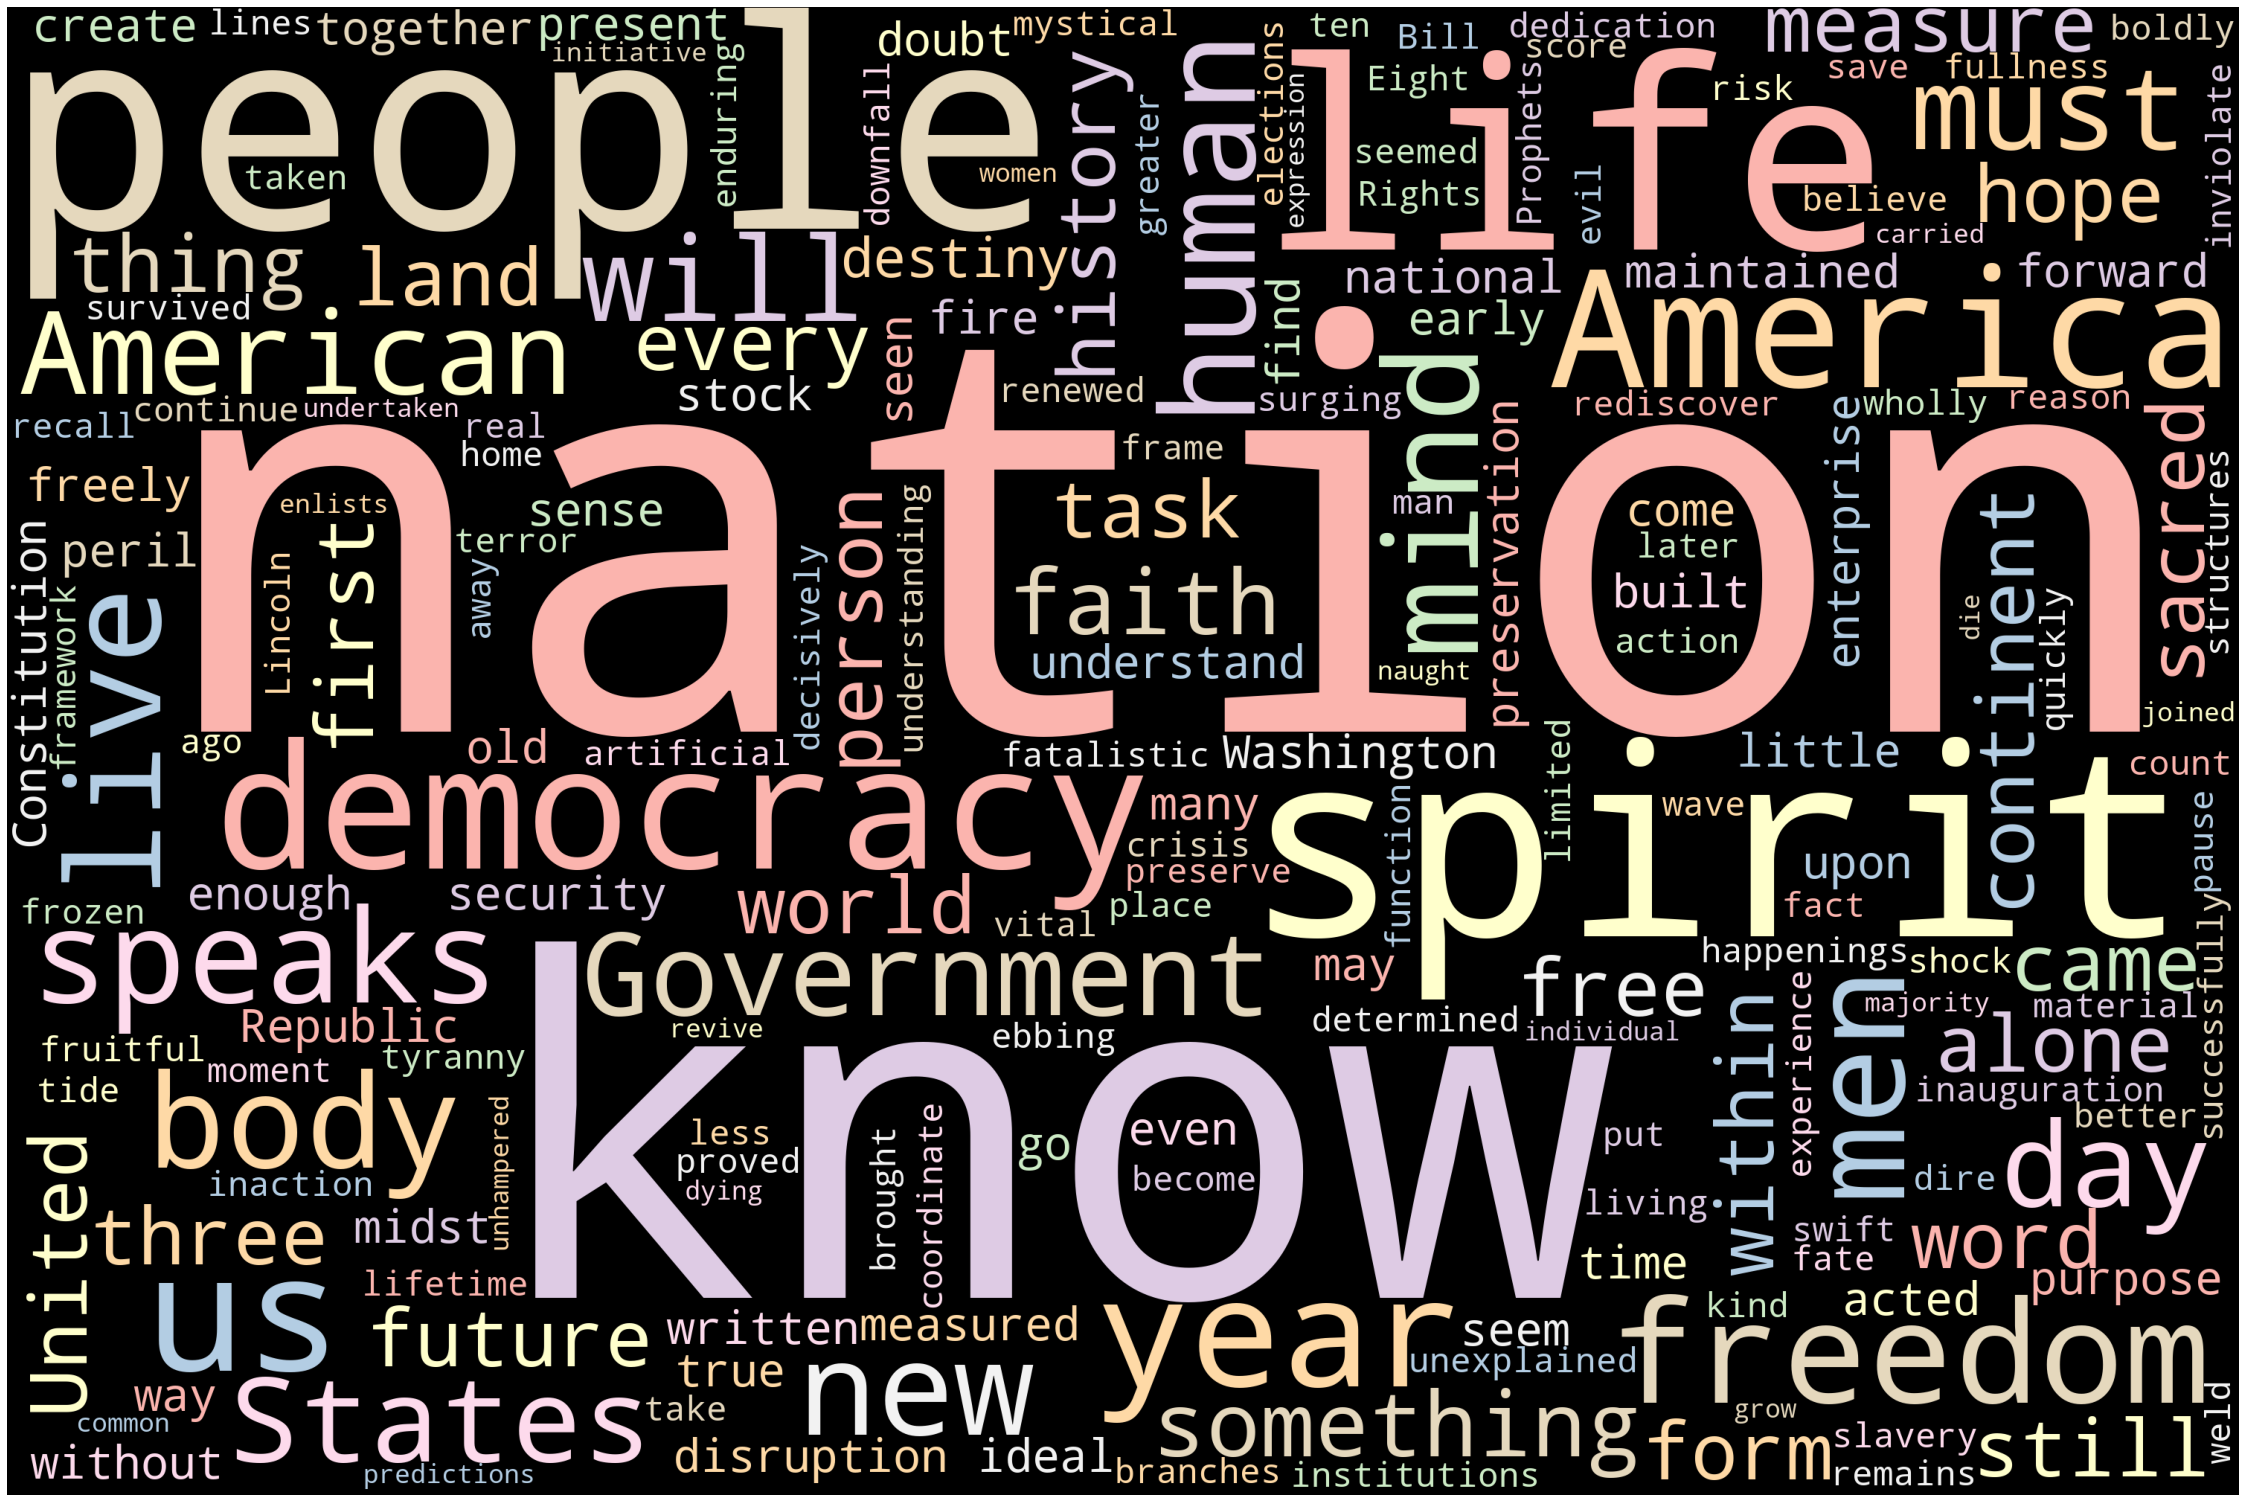

In [ ]:
# Generate word cloud Roosvelt
wordcloud_Roosvelt = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(Roosvelt)
# Plot
plot_cloud(wordcloud_Roosvelt)

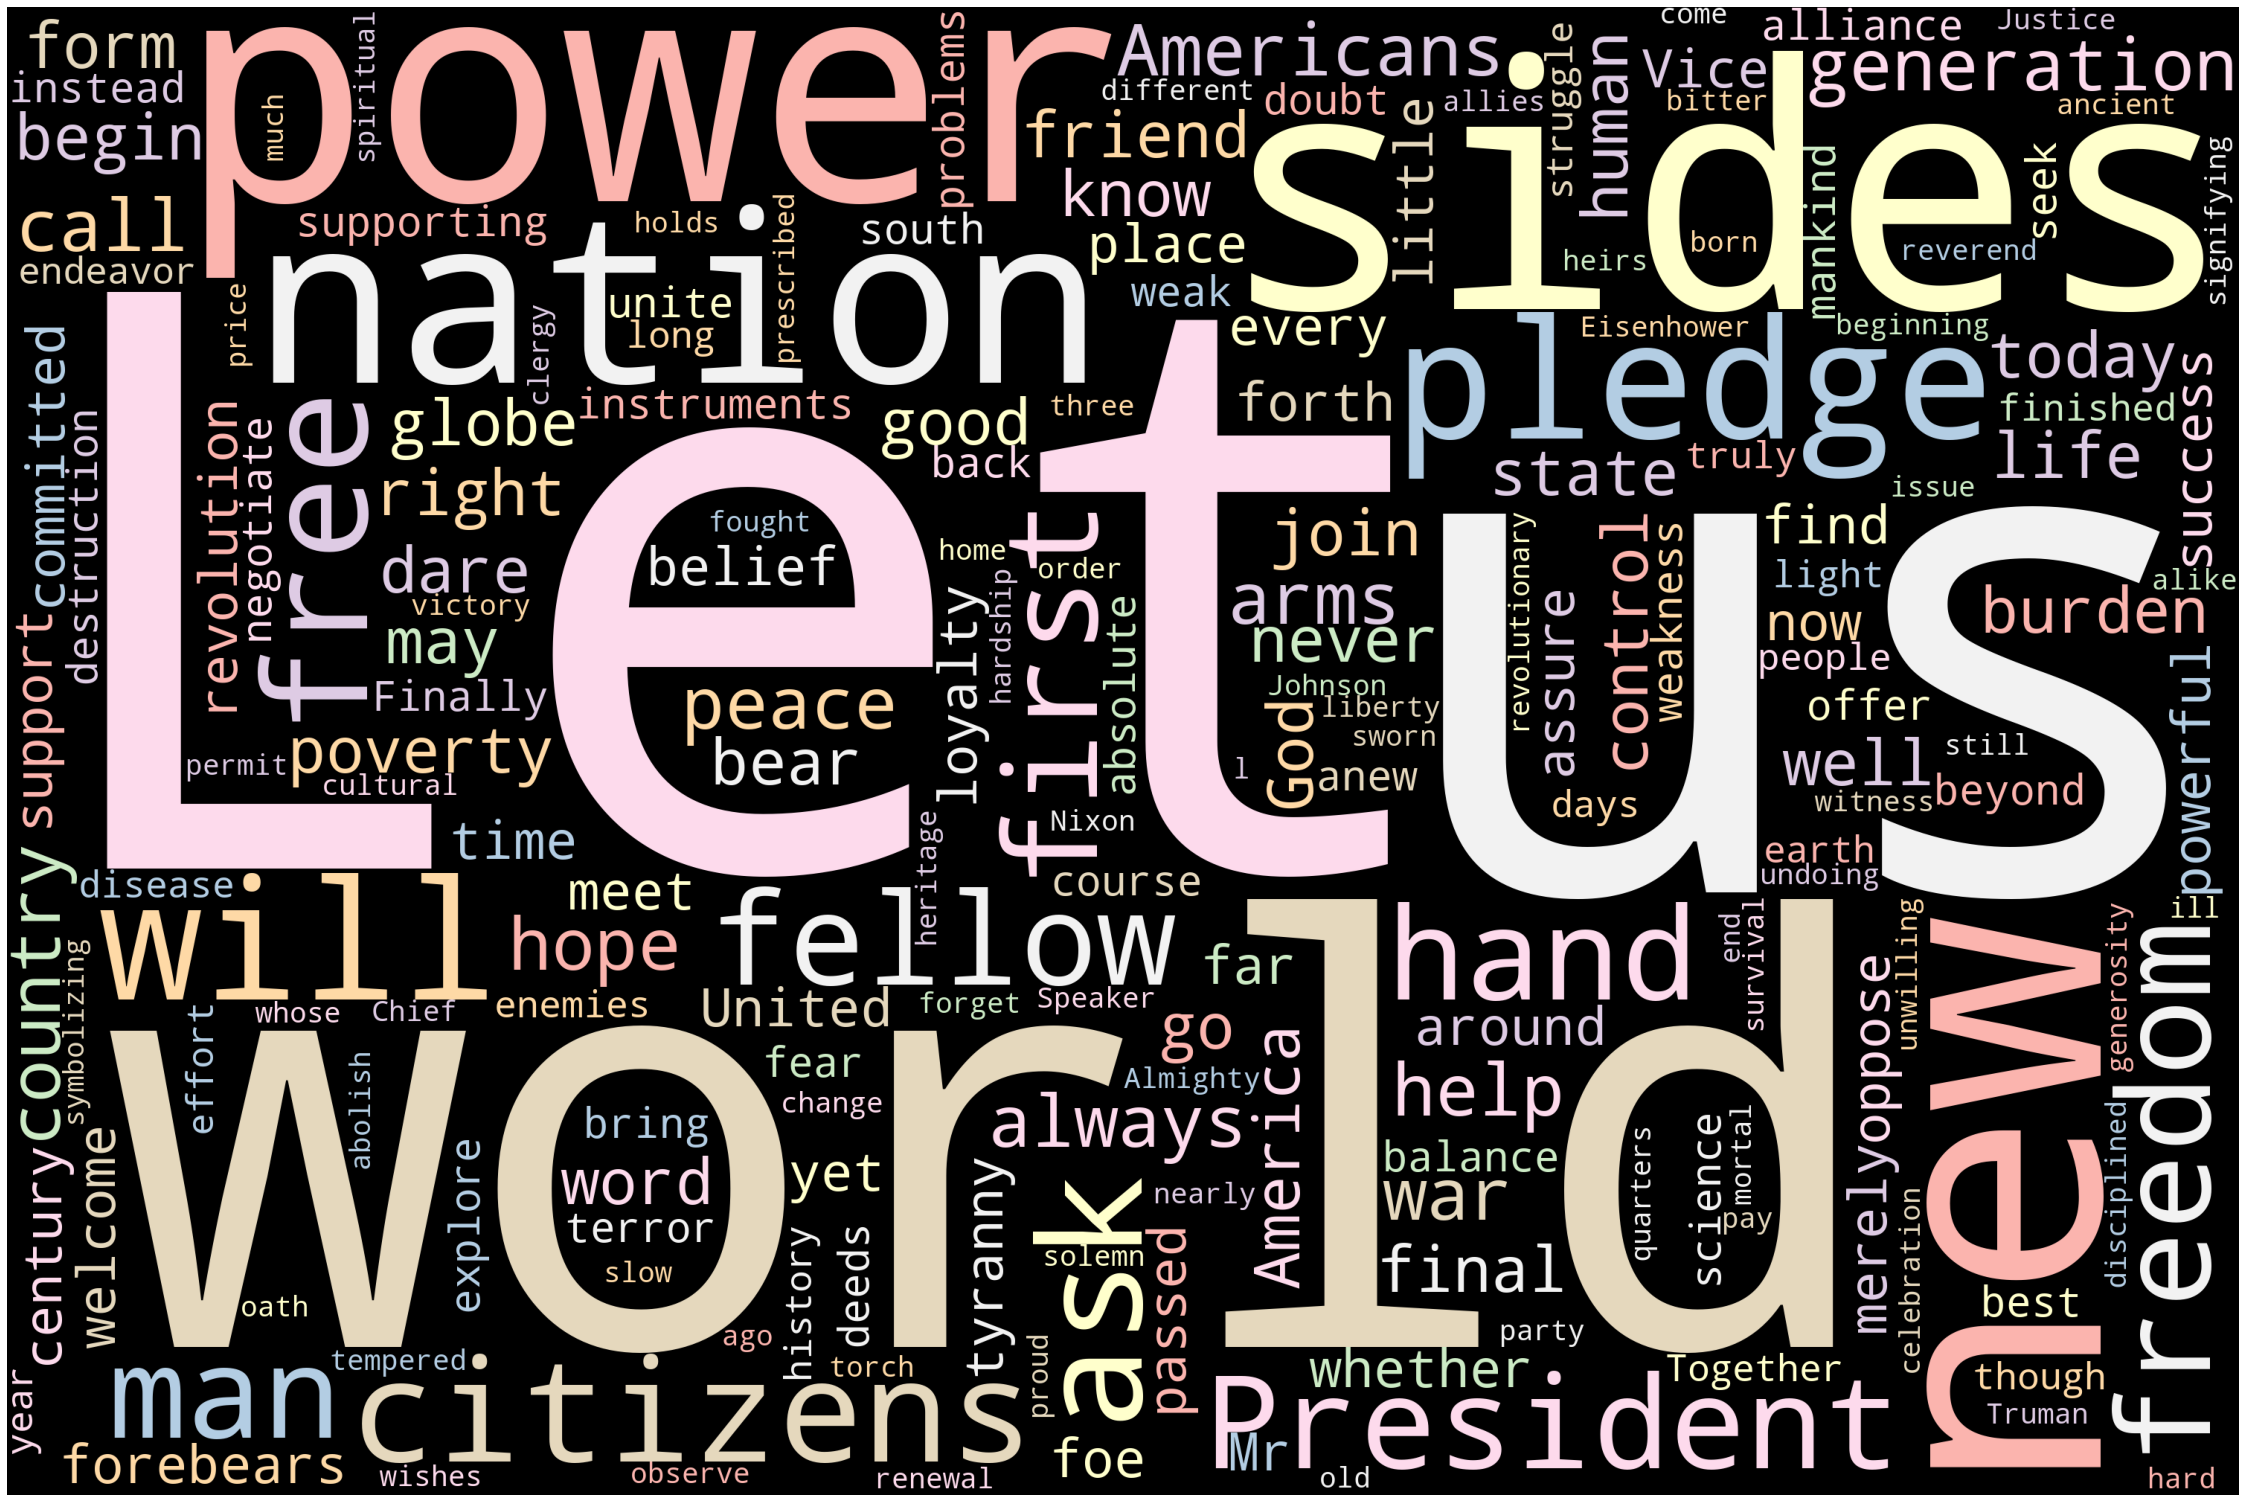

In [ ]:
# Generate word cloud Kennedy
wordcloud_Kennedy = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(Kennedy)
# Plot
plot_cloud(wordcloud_Kennedy)

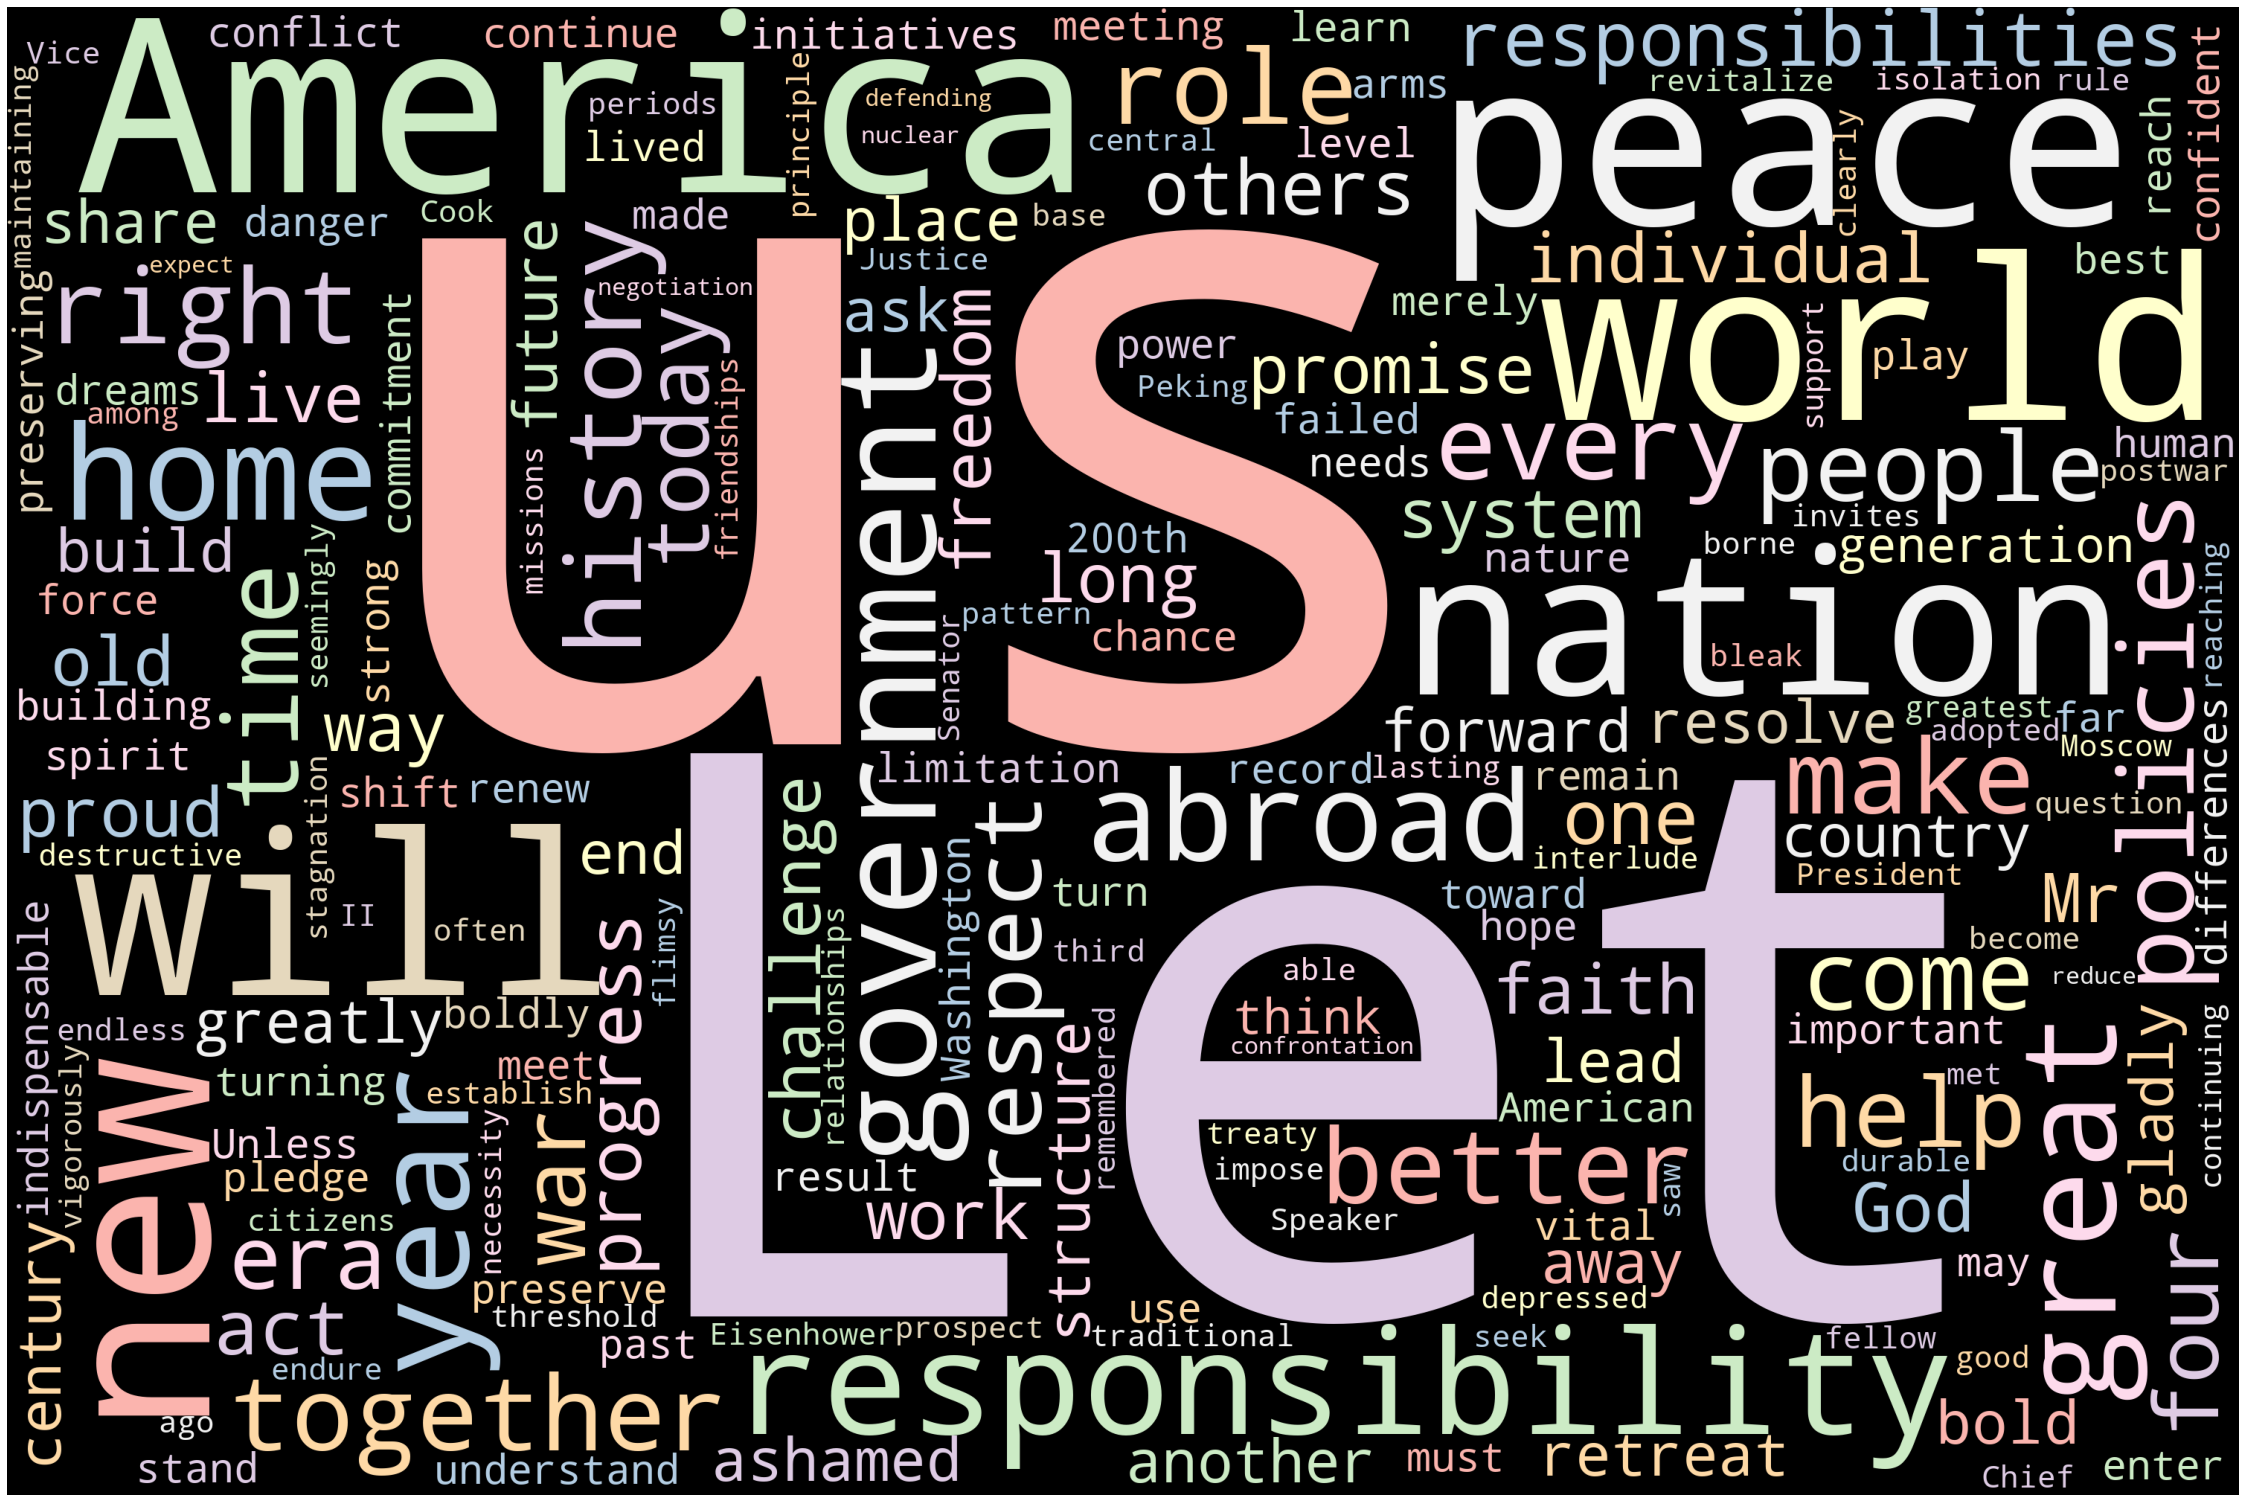

In [ ]:
# Generate word cloud Nixon
wordcloud_Nixon = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(Nixon)
# Plot
plot_cloud(wordcloud_Nixon)